<a href="https://colab.research.google.com/github/maiaufrrj/superstore_data/blob/main/modelo_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#!pip install fbprophet
#!pip install pystan
#!pip install --upgrade plotly
#! pip install statsmodels

In [10]:
# importar os pacotes necessários
import pandas as pd
import plotly.express as px
import numpy as np

#importar o arquivo csv do meu repositório público no github 
dataset='https://raw.githubusercontent.com/maiaufrrj/superstore_data/main/superstore_dataset2011-2015.csv'
df = pd.read_csv(dataset, encoding= 'unicode_escape')

# visualizar início dos dados
df.head()

Row ID         Order ID Order Date  ...   Profit Shipping Cost Order Priority
0   42433     AG-2011-2040   1/1/2011  ...  106.140         35.46         Medium
1   22253    IN-2011-47883   1/1/2011  ...   36.036          9.72         Medium
2   48883     HU-2011-1220   1/1/2011  ...   29.640          8.17           High
3   11731  IT-2011-3647632   1/1/2011  ...  -26.055          4.82           High
4   22255    IN-2011-47883   1/1/2011  ...   37.770          4.70         Medium

[5 rows x 24 columns]

In [11]:
#criando dicionário para entender cada recurso disponível e posteriormente modificar dataframe
columns = {'Row ID':'id_linha',
           'Order ID': 'id_pedido', 
           'Order Date': 'data_pedido',
           'Ship Date': 'data_envio',
           'Ship Mode': 'modalidade_frete',
           'Customer ID': 'id_cliente',
           'Customer Name': 'cliente',
           'Segment': 'segmento',
           'City': 'cidade',
           'State': 'estado',
           'Country': 'país',
           'Postal Code': 'cod_postal',
           'Market': 'mercado',
           'Region': 'regiao',
           'Product ID': 'id_produto',
           'Category': 'categoria_produto',
           'Sub-Category': 'subcategoria_produto',
           'Product Name': 'produto',
           'Sales': 'vendas',
           'Quantity': 'quantidade',
           'Discount': 'desconto',
           'Profit': 'lucro',
           'Shipping Cost': 'custo_envio',
           'Order Priority': 'prioridade'
           }
#trocando nomes das colunas e selecionando coluna de índice
df=df.rename(columns=columns).set_index('id_pedido')   

In [12]:
df.head()

id_linha data_pedido  ... custo_envio prioridade
id_pedido                              ...                       
AG-2011-2040        42433    1/1/2011  ...       35.46     Medium
IN-2011-47883       22253    1/1/2011  ...        9.72     Medium
HU-2011-1220        48883    1/1/2011  ...        8.17       High
IT-2011-3647632     11731    1/1/2011  ...        4.82       High
IN-2011-47883       22255    1/1/2011  ...        4.70     Medium

[5 rows x 23 columns]

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.datasets import load_iris
#X,y=load_iris(return_X_y=True)

X_class = df[['vendas', 'desconto', 'lucro', 'custo_envio']].to_numpy()
y_class = df[['mercado']].to_numpy()

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_class)
#y_scaled = scaler_y.fit(y_class)
#dividindo

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.30, random_state=13)
n_neighbors = int(df[['mercado']].nunique())
n_neighbors =100

In [84]:
df[['mercado']].value_counts()

mercado
APAC       11002
LATAM      10294
EU         10000
US          9994
EMEA        5029
Africa      4587
Canada       384
dtype: int64

In [116]:
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, target_names=['APAC', 'LATAM', 'EU','US','EMEA','Africa','Canada']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

        APAC       0.55      0.47      0.50      3306
       LATAM       0.49      0.21      0.29      1410
          EU       0.00      0.00      0.00       110
          US       0.61      0.27      0.38      1550
        EMEA       0.32      0.48      0.39      2914
      Africa       0.35      0.42      0.38      3077
      Canada       0.56      0.58      0.57      3020

    accuracy                           0.44     15387
   macro avg       0.41      0.35      0.36     15387
weighted avg       0.46      0.44      0.43     15387



In [13]:
#plano amostral -- bootstrap (amostra aleatória simples com reposição)
#referencia: 
#SCIENTIFIC RESEARCH METHODOLOGY: GUIDELINES FOR SIZE SAMPLE CALCULATION
#Mauro José FONTELLES, Marilda Garcia SIMÕES, Jairo Cunha de ALMEIDA e Renata Garcia Simões FONTELLES
#http://files.bvs.br/upload/S/0101-5907/2010/v24n2/a2125.pdf

erro_amostral=0.02
n0=1/(erro_amostral**2)
n=(df.shape[0]*n0)/(df.shape[0]+n0)
print('Para uma população de '+ str(df.shape[0]) + ' será necessária uma amostra de ' + str(round(n,0)) + ' registros')

Para uma população de 51290 será necessária uma amostra de 2384.0 registros


In [14]:
tamanho_populacao = df.shape[0]
tamanho_amostra = n

amostra1 = df.sample(n=int(tamanho_amostra), random_state=0)
amostra1 =amostra1[['vendas','custo_envio']]

amostra2 = df.sample(n=int(tamanho_amostra), random_state=42)
amostra2 =amostra2[['vendas','desconto']]

In [15]:
import plotly.express as px
fig1 = px.histogram(amostra1, x='custo_envio', y='vendas', nbins=20, histfunc='sum')
fig2 = px.histogram(amostra2, x='desconto', y='vendas', nbins=20, histfunc='sum')
fig1.show()
fig2.show()

In [16]:
df['vendas_unit']=df['vendas']/df['quantidade']
df['custo_envio_unit']=df['custo_envio']/df['quantidade']
df['lucro_unit']=df['lucro']/df['quantidade']
df.head()

id_linha data_pedido  ... custo_envio_unit lucro_unit
id_pedido                              ...                            
AG-2011-2040        42433    1/1/2011  ...        17.730000     53.070
IN-2011-47883       22253    1/1/2011  ...         3.240000     12.012
HU-2011-1220        48883    1/1/2011  ...         2.042500      7.410
IT-2011-3647632     11731    1/1/2011  ...         1.606667     -8.685
IN-2011-47883       22255    1/1/2011  ...         0.940000      7.554

[5 rows x 26 columns]

In [17]:
fig1 = px.histogram(df, x='mercado', y='vendas', histfunc='sum').update_xaxes(categoryorder='total descending')
fig1.show()

In [18]:
fig2 = px.histogram(df, x='mercado', y="custo_envio", histfunc='sum').update_xaxes(categoryorder='total descending')
fig2.show()

In [19]:
#verificando os 20 países que somaram as maiores vendas
topVendas_20_paises = df.groupby(['país']).agg({'vendas':sum})
topVendas_20_paises.sort_values(by='vendas', ascending=False, inplace=True)
topVendas_20_paises.style.format("{:.1f}")
topVendas_20_paises = topVendas_20_paises[:20]

fig2 = px.histogram(topVendas_20_paises, x=topVendas_20_paises.index, y='vendas', histfunc='sum').update_xaxes(categoryorder='total descending')
fig2.show()

In [20]:
#verificando os 20 países que somaram os maiores lucros
topLucro_20_paises = df.groupby(['mercado']).agg({'lucro':sum})
topLucro_20_paises.sort_values(by='lucro', ascending=False, inplace=True)
topLucro_20_paises.style.format("{:.1f}")
topLucro_20_paises = topLucro_20_paises[:20]

fig3 = px.histogram(topLucro_20_paises, x=topLucro_20_paises.index, y='lucro', histfunc='sum').update_xaxes(categoryorder='total descending')
fig3.show()

In [21]:
#verificando os 20 países que somaram os menores lucros
bottomLucro_20_paises = df.groupby(['país']).agg({'lucro':sum})
bottomLucro_20_paises.sort_values(by='lucro', ascending=True, inplace=True)
bottomLucro_20_paises.style.format("{:.1f}")
bottomLucro_20_paises = bottomLucro_20_paises[:20]

fig3 = px.histogram(bottomLucro_20_paises, x=bottomLucro_20_paises.index, y='lucro', histfunc='sum').update_xaxes(categoryorder='total ascending')
fig3.show()

In [22]:
import plotly.io as pio
aggs = ["count","sum","avg","median","mode","rms","stddev","min","max","first","last"]

agg = []
agg_func = []
for i in range(0, len(aggs)):
    agg = dict(
        args=['transforms[0].aggregations[0].func', aggs[i]],
        label=aggs[i],
        method='restyle'
    )
    agg_func.append(agg)

data = [dict(
  type = 'choropleth',
  locationmode = 'country names',
  locations = df['país'],
  z = df['vendas'],
  autocolorscale = False,
  colorscale = 'Portland',
  reversescale = False,
  transforms = [dict(
    type = 'aggregate',
    groups = df['país'],
    aggregations = [dict(
        target = 'z', func = 'sum', enabled = True)
    ]
  )]
)]

layout = dict(
  title = '<b>Agregação de Vendas</b><br>escolha o tipo de agregação',
  xaxis = dict(title = 'Subject'),
  yaxis = dict(title = 'Score', range = [0,22]),
  height = 600,
  width = 900,
  updatemenus = [dict(
        x = 0.85,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 1,
        showactive = False,
        buttons = agg_func
  )]
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

In [23]:
import plotly.io as pio
aggs = ["count","sum","avg","median","mode","rms","stddev","min","max","first","last"]

agg = []
agg_func = []
for i in range(0, len(aggs)):
    agg = dict(
        args=['transforms[0].aggregations[0].func', aggs[i]],
        label=aggs[i],
        method='restyle'
    )
    agg_func.append(agg)

data = [dict(
  type = 'choropleth',
  locationmode = 'country names',
  locations = df['país'],
  z = df['lucro'],
  autocolorscale = False,
  colorscale = 'Portland',
  reversescale = False,
  transforms = [dict(
    type = 'aggregate',
    groups = df['país'],
    aggregations = [dict(
        target = 'z', func = 'sum', enabled = True)
    ]
  )]
)]

layout = dict(
  title = '<b>Agregação de Lucro</b><br>escolha o tipo de agregação',
  xaxis = dict(title = 'Subject'),
  yaxis = dict(title = 'Score', range = [0,22]),
  height = 600,
  width = 900,
  updatemenus = [dict(
        x = 0.85,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 1,
        showactive = False,
        buttons = agg_func
  )]
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

In [24]:
#criar dataset resumido em vendas mensais
df2=df
df2.index = pd.to_datetime(df2['data_pedido'])

df2['mes_ano'] = pd.to_datetime(df2['data_pedido']).apply(lambda x: '{month}-{year}'.format(month=x.month, year=x.year))

df_vendas = df2.groupby('mes_ano')['vendas'].sum()
df_vendas.to_frame()

df_vendas = pd.DataFrame({'mes_ano':df_vendas.index, 'vendas':df_vendas.values})
df_vendas['ano'] = pd.DatetimeIndex(df_vendas['mes_ano']).year
df_vendas['mes'] = pd.DatetimeIndex(df_vendas['mes_ano']).month

#último dia do mês
from pandas.tseries.offsets import MonthEnd
df_vendas['ultimo_dia_mes'] = pd.to_datetime(df_vendas['mes_ano']) + MonthEnd(1)

df_vendas = df_vendas.sort_values(['ano', 'mes'], ascending = (True, True))
df_vendas.set_index('mes_ano')
#df_vendas.head(50)

vendas   ano  mes ultimo_dia_mes
mes_ano                                        
1-2011   138241.30042  2011    1     2011-01-31
2-2011   134969.94086  2011    2     2011-02-28
3-2011   171455.59372  2011    3     2011-03-31
4-2011   128833.47034  2011    4     2011-04-30
5-2011   148146.72092  2011    5     2011-05-31
6-2011   189338.43966  2011    6     2011-06-30
7-2011   162034.69756  2011    7     2011-07-31
8-2011   219223.49524  2011    8     2011-08-31
9-2011   255237.89698  2011    9     2011-09-30
10-2011  204675.07846  2011   10     2011-10-31
11-2011  214934.29386  2011   11     2011-11-30
12-2011  292359.96752  2011   12     2011-12-31
1-2012   162800.89338  2012    1     2012-01-31
2-2012   152661.15144  2012    2     2012-02-29
3-2012   201608.72784  2012    3     2012-03-31
4-2012   187469.96192  2012    4     2012-04-30
5-2012   218960.16042  2012    5     2012-05-31
6-2012   249289.77172  2012    6     2012-06-30
7-2012   174394.02808  2012    7     2012-07-31
8-2012   271669.66086  2012    8     2012-08-31
9-2012   256567.85308  2012    9     2012-09-30
10-2012  239321.09904  2012   10     2012-10-31
11-2012  270723.05356  2012   11     2012-11-30
12-2012  291972.33306  2012   12     2012-12-31
1-2013   206459.19582  2013    1     2013-01-31
2-2013   191062.77216  2013    2     2013-02-28
3-2013   230547.79468  2013    3     2013-03-31
4-2013   233181.34844  2013    4     2013-04-30
5-2013   304509.96336  2013    5     2013-05-31
6-2013   341162.34370  2013    6     2013-06-30
7-2013   223642.65664  2013    7     2013-07-31
8-2013   323876.60716  2013    8     2013-08-31
9-2013   326897.27044  2013    9     2013-09-30
10-2013  270121.87570  2013   10     2013-10-31
11-2013  383039.21248  2013   11     2013-11-30
12-2013  371245.40880  2013   12     2013-12-31
1-2014   268265.52240  2014    1     2014-01-31
2-2014   244159.30486  2014    2     2014-02-28
3-2014   347720.96868  2014    3     2014-03-31
4-2014   302132.54000  2014    4     2014-04-30
5-2014   304798.83604  2014    5     2014-05-31
6-2014   372577.23298  2014    6     2014-06-30
7-2014   278672.17326  2014    7     2014-07-31
8-2014   432731.04194  2014    8     2014-08-31
9-2014   405436.70584  2014    9     2014-09-30
10-2014  406659.41500  2014   10     2014-10-31
11-2014  508954.73156  2014   11     2014-11-30
12-2014  427757.39800  2014   12     2014-12-31

In [ ]:
#gráfico para visualizar evolução de vendas
fig = px.line(df_vendas, x='ultimo_dia_mes', y="vendas")
fig.show()

In [ ]:
#Teste de Dickey Fuller Aumentado - Verificando Estacionariedade
from statsmodels.tsa.stattools import adfuller
X = df_vendas['vendas'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



ADF Statistic: 0.046292
p-value: 0.962197
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602


In [ ]:
train_size = int(0.85 * len(df_vendas))
test_size = len(df_vendas) - train_size

univariate_df = df_vendas[['ultimo_dia_mes', 'vendas']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

In [ ]:
#https://towardsdatascience.com/time-series-prediction-using-prophet-in-python-35d65f626236
#https://towardsdatascience.com/facebook-prophet-for-time-series-forecasting-in-python-part1-d9739cc79b1d
from sklearn.metrics import mean_absolute_error, mean_squared_error
from fbprophet import Prophet
import math

#instanciando e treinando modelo
model = Prophet(changepoint_prior_scale= 0.01, seasonality_prior_scale= 1.0) #hiperparâmetros ajustados
model.fit(train)
future = model.make_future_dataframe(periods=12, freq='m')

# Conjunto de Previsão
y_pred = model.predict(future)

from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, y_pred)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


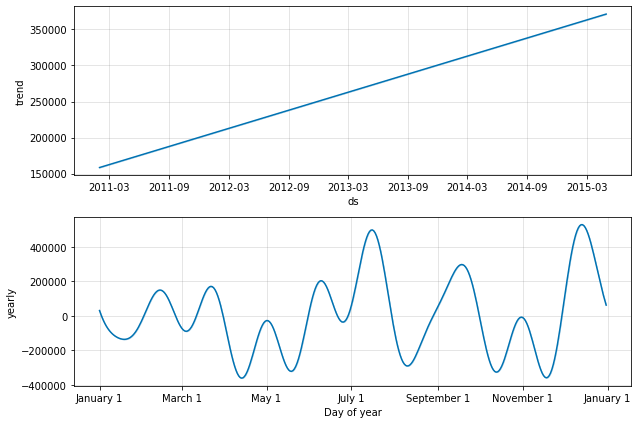

In [ ]:
componentes = model.plot_components(y_pred)

In [ ]:
#validação cruzada
#https://facebook.github.io/prophet/docs/diagnostics.html
from fbprophet.diagnostics import cross_validation, performance_metrics
df_vendas_cv = cross_validation(model, initial='913 days', period='60 days', horizon = '30 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-08-03 00:00:00 and 2014-03-31 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
relatorio_cv = performance_metrics(df_vendas_cv)
relatorio_cv.sort_values(by='mape').head(50)

horizon           mse          rmse  ...      mape     mdape  coverage
0  1 days  6.146884e+05    784.020682  ...  0.002923  0.002923       1.0
1 28 days  1.011751e+08  10058.581423  ...  0.031057  0.031057       1.0
3 30 days  3.332746e+08  18255.808804  ...  0.054089  0.054089       0.5
2 29 days  3.439327e+08  18545.421364  ...  0.070606  0.070606       0.5

[4 rows x 7 columns]

In [ ]:
relatorio_cv['mape'].mean()

0.039668480658454894

MAPE: Erro Absoluto Médio Percentual

# 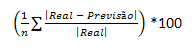

In [ ]:
#tunando hiperparâmetros do modelo
import itertools
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Gerando combinação de parâmetros
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # guardar MAPEs para cada parâmetro aqui

# Usar validação cruzada para avaliar todos os parâmetros
for params in all_params:
    m = Prophet(**params).fit(train)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

# Encontrar melhores parâmetros
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
print(tuning_results)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f77435e8290>
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f77436b6590>
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run p

    changepoint_prior_scale  seasonality_prior_scale      mape
0                     0.001                     0.01  0.245659
1                     0.001                     0.10  0.039077
2                     0.001                     1.00  0.035056
3                     0.001                    10.00  0.034864
4                     0.010                     0.01  0.241674
5                     0.010                     0.10  0.038628
6                     0.010                     1.00  0.034489
7                     0.010                    10.00  0.034806
8                     0.100                     0.01  0.242812
9                     0.100                     0.10  0.038836
10                    0.100                     1.00  0.064906
11                    0.100                    10.00  0.079548
12                    0.500                     0.01  0.261525
13                    0.500                     0.10  0.050408
14                    0.500                     1.00  0

In [ ]:
tuning_results

changepoint_prior_scale  seasonality_prior_scale      mape
0                     0.001                     0.01  0.245659
1                     0.001                     0.10  0.039077
2                     0.001                     1.00  0.035056
3                     0.001                    10.00  0.034864
4                     0.010                     0.01  0.241674
5                     0.010                     0.10  0.038628
6                     0.010                     1.00  0.034489
7                     0.010                    10.00  0.034806
8                     0.100                     0.01  0.242812
9                     0.100                     0.10  0.038836
10                    0.100                     1.00  0.064906
11                    0.100                    10.00  0.079548
12                    0.500                     0.01  0.261525
13                    0.500                     0.10  0.050408
14                    0.500                     1.00  0.065482
15                    0.500                    10.00  0.042218

In [ ]:
best_params = all_params[np.argmin(mapes)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0}


In [ ]:
data_pred = y_pred.ds
pred = y_pred.yhat
venda_mensal_bruta = df_vendas.vendas
#vazio=pd.Series(['-','-','-','-'])
vazio=pd.Series([0,0,0,0])

venda_mensal = venda_mensal_bruta.append(vazio)
data_real = df_vendas.ultimo_dia_mes
data_real = data_real.append(vazio)
df_final = pd.DataFrame(venda_mensal.values, index=data_pred, columns=['Venda Mensal Real'])
df_final['Previsão Mensal'] = pred.values
df_final

Venda Mensal Real  Previsão Mensal
ds                                            
2011-01-31       138241.30042    116586.678313
2011-02-28       134969.94086    110686.085251
2011-03-31       171455.59372    176055.961066
2011-04-30       128833.47034    134809.149612
2011-05-31       148146.72092    157929.596430
2011-06-30       189338.43966    199174.550046
2011-07-31       162034.69756    155331.785886
2011-08-31       219223.49524    214942.442340
2011-09-30       255237.89698    245980.749585
2011-10-31       204675.07846    187356.936438
2011-11-30       214934.29386    216223.992366
2011-12-31       292359.96752    279790.185916
2012-01-31       162800.89338    162552.634002
2012-02-29       152661.15144    150385.558262
2012-03-31       201608.72784    199398.185793
2012-04-30       187469.96192    190457.815942
2012-05-31       218960.16042    236629.390532
2012-06-30       249289.77172    268865.172954
2012-07-31       174394.02808    171655.336387
2012-08-31       271669.66086    277074.189260
2012-09-30       256567.85308    266545.048843
2012-10-31       239321.09904    238358.247381
2012-11-30       270723.05356    308410.604860
2012-12-31       291972.33306    309872.445554
2013-01-31       206459.19582    225317.668303
2013-02-28       191062.77216    203818.063185
2013-03-31       230547.79468    258562.754635
2013-04-30       233181.34844    239020.778075
2013-05-31       304509.96336    277300.106400
2013-06-30       341162.34370    312171.598928
2013-07-31       223642.65664    232861.272360
2013-08-31       323876.60716    323180.894719
2013-09-30       326897.27044    326583.553151
2013-10-31       270121.87570    288486.263987
2013-11-30       383039.21248    344458.856981
2013-12-31       371245.40880    366531.177568
2014-01-31       268265.52240    271150.419166
2014-02-28       244159.30486    257407.862813
2014-03-31       347720.96868    317606.557565
2014-04-30       302132.54000    287290.931264
2014-05-31       304798.83604    317883.046787
2014-06-30       372577.23298    355759.510479
2014-07-31       278672.17326    294244.232541
2014-08-31       432731.04194    369291.709946
2014-09-30       405436.70584    386552.978090
2014-10-31       406659.41500    338306.094337
2014-11-30       508954.73156    380545.712076
2014-12-31       427757.39800    423324.999835
2015-01-31            0.00000    317048.231780
2015-02-28            0.00000    311147.681122
2015-03-31            0.00000    376517.603885
2015-04-30            0.00000    335270.837864

In [ ]:
grafico_final = px.line(df_final, y=['Venda Mensal Real', 'Previsão Mensal'], x=df_final.index)
grafico_final.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape=mean_absolute_percentage_error(venda_mensal_bruta, pred[:48])
mape = "%0.2f" % mape
print('Ao longo da série temos uma MAPE de: ' + mape + '%')

Ao longo da série temos uma MAPE de: 6.07%
